In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/fernandovieira/OneDrive/1. Educacao/INFO E ESTAT/BASES DE DADOS/BD_ML-e-DS-com-Python-de-A-a-Z/house_prices.csv')
# df = pd.read_csv('/content/house_prices.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


/Users/fernandovieira/opt/anaconda3/envs/estat_ML/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

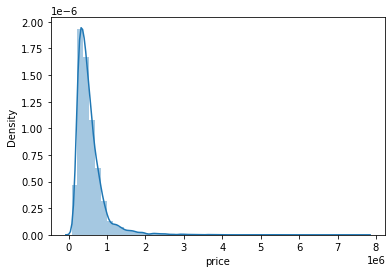

In [5]:
sns.distplot(df['price'])

# formato de distribuição gama

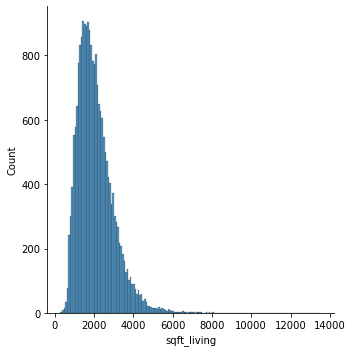

In [6]:
sns.displot(df['sqft_living'])

# formato de distribuição gama

In [ ]:
# Converter os dados para uma distribuição normal tende a apresentar melhores resultados em modelos de ML

Sem tratamento de dados

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
x = df['sqft_living'].values

In [9]:
x.shape

(21613,)

In [10]:
x = x.reshape(-1, 1)

In [11]:
x.shape

(21613, 1)

In [12]:
y = df['price'].values

In [13]:
regressor = LinearRegression()

regressor.fit(x, y)

LinearRegression()

In [14]:
previsoes = regressor.predict(x)
previsoes

array([287555.06702452, 677621.82640197, 172499.40418656, ...,
       242655.29616092, 405416.96554144, 242655.29616092])

In [15]:
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [16]:
from sklearn.metrics import mean_absolute_error, r2_score

In [17]:
mean_absolute_error(y, previsoes)

173688.2733595311

In [18]:
r2_score(y, previsoes)

0.4928532179037931

Com tratamento de dados

In [ ]:
# formas de normalizar: https://towardsdatascience.com/transforming-skewed-data-73da4c2d0d16

In [20]:
x_novo = np.log(x)
x_novo

array([[7.07326972],
       [7.85166118],
       [6.64639051],
       ...,
       [6.92755791],
       [7.37775891],
       [6.92755791]])

/Users/fernandovieira/opt/anaconda3/envs/estat_ML/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

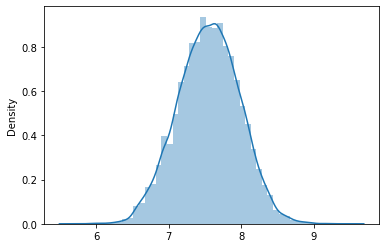

In [21]:
sns.distplot(x_novo)

In [29]:
y_novo = np.log(y)
y_novo

array([12.30998211, 13.19561384, 12.10071213, ..., 12.90445858,
       12.89921983, 12.69158046])

/Users/fernandovieira/opt/anaconda3/envs/estat_ML/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

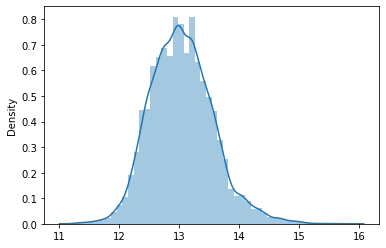

In [34]:
sns.distplot(y_novo)

In [30]:
regressor = LinearRegression()

regressor.fit(x_novo, y_novo)

LinearRegression()

In [31]:
previsoes = regressor.predict(x_novo)
previsoes

array([12.64862279, 13.29995815, 12.29142267, ..., 12.52669538,
       12.9034105 , 12.52669538])

In [32]:
mean_absolute_error(y_novo, previsoes)

0.314671784942507

In [33]:
r2_score(y_novo, previsoes)

0.45550706431577015